Helpful links:
1. https://www.kaggle.com/code/mgmarques/wines-type-and-quality-classification-exercises/notebook#Conclusion
2. https://www.kaggle.com/code/mateuszk013/icr-eda-balanced-learning-with-lgbm-xgb
3. https://www.kaggle.com/code/farzadnekouei/imbalanced-personal-bank-loan-classification
4. https://www.kaggle.com/learn/time-series
5. https://www.kaggle.com/code/viveksrinivasan/eda-ensemble-model-top-10-percentile

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_excel('./drive/MyDrive/Colab Notebooks/data/Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# EDA

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

In [19]:
df.isna().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


In [20]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Missing value treatment (imputation)

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(df)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### duplicated value treatment

In [22]:
df[df.duplicated(keep=False)].sum().sum()

0.0

## distribution analysis

### Target distribution

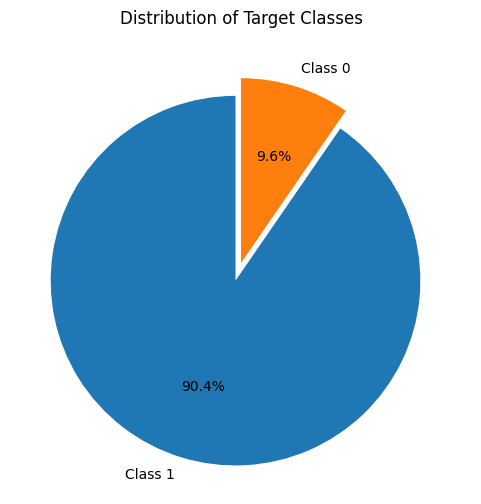

In [23]:
target_counts = df['Personal Loan'].value_counts()
plt.figure(figsize=(6, 6))
target_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['Class 1', 'Class 0'],
    startangle=90,
    explode=(0.1, 0),  # To highlight the first slice
    shadow=False
)
plt.title('Distribution of Target Classes')
plt.ylabel('')  # Remove y-axis label for clarity
plt.show()

key insight: class 0 is minority class and we need imbalanced learning

In [38]:
df.drop('ID',inplace=True,axis=1)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
numerical_features = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]
categorical_features = ["Family", "Education", "Securities Account", "CD Account", "Online", "CreditCard"]

### numerical distribution analysis

<ipython-input-24-e5a2639d1c90>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True, bins=15, ax=ax, color='skyblue')
<ipython-input-24-e5a2639d1c90>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True, bins=15, ax=ax, color='skyblue')
<ipython-input-24-e5a2

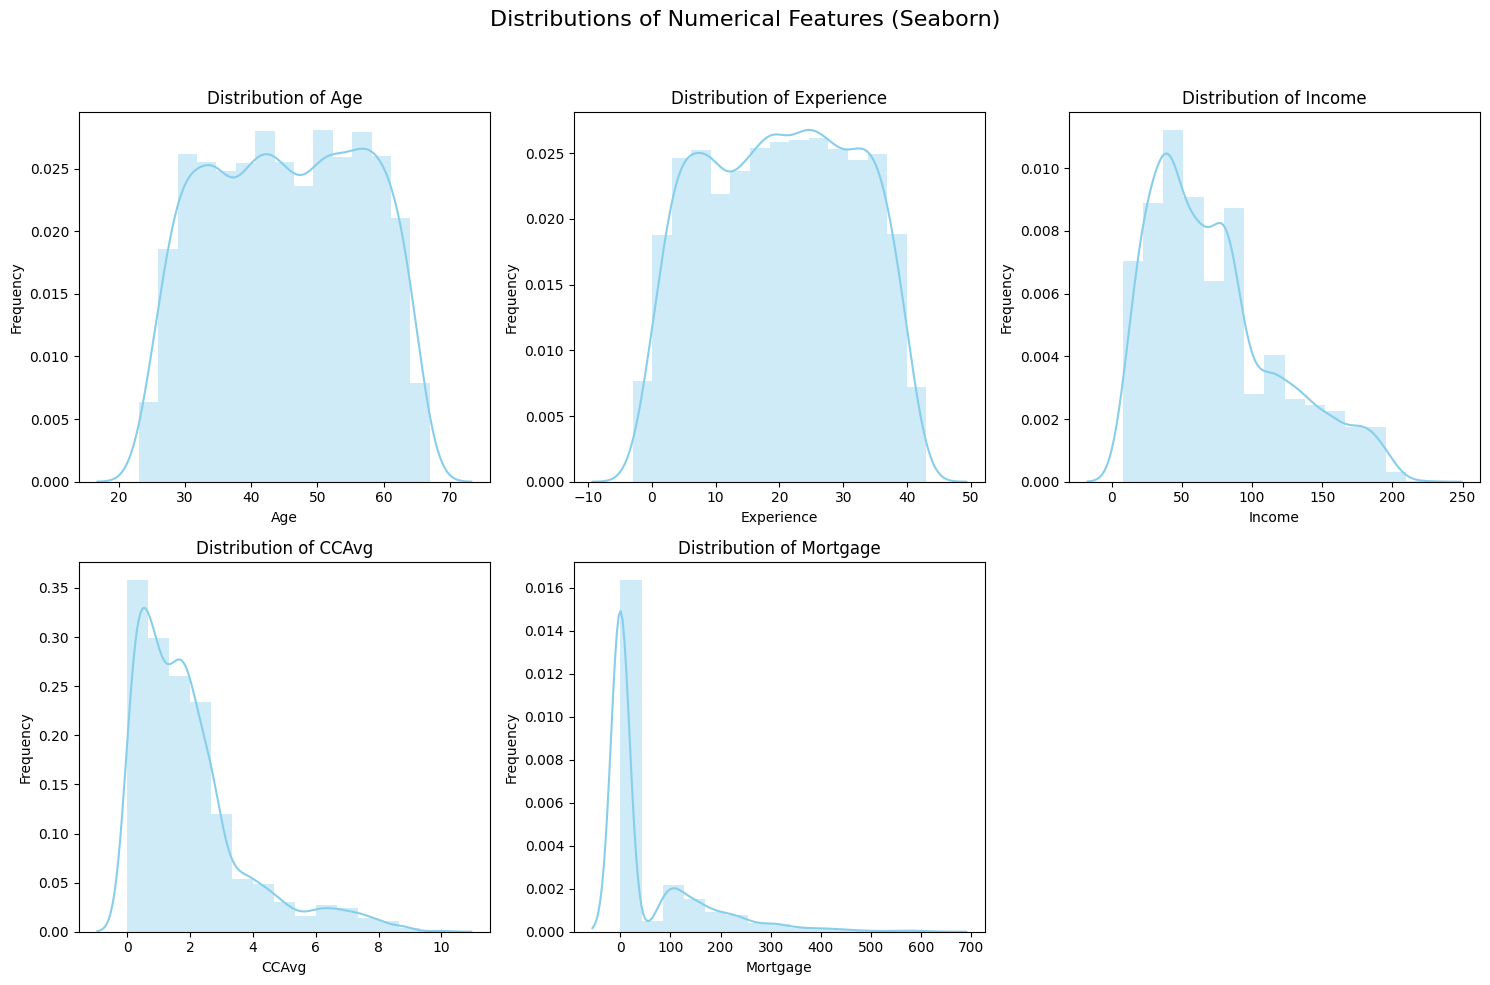

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Distributions of Numerical Features (Seaborn)", fontsize=16)

for i, feature in enumerate(numerical_features):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    #sns.histplot(df[feature], kde=True, bins=15, ax=ax, color='skyblue')
    sns.distplot(df[feature], kde=True, bins=15, ax=ax, color='skyblue')
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")

axes[1, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include the title
plt.show()

Key insights:
- Income, CCAvg, and Mortgage distribution are heavily skewed. We need transformation as preprocess. For Mortgage, it may also be helpful to do binarization.

- Experience has some negative distribution, which does not make sense. I droped the rows here.

- there is something wrong with ZIP code and experience

### Noise treatment for numerical values (identify wrong values)

In [25]:
df['ZIP Code'].describe()

,ZIP Code
count,5000.000000
mean,93152.503000
std,2121.852197
min,9307.000000
25%,91911.000000
50%,93437.000000
75%,94608.000000
max,96651.000000


we should drop outliers here

In [26]:
df = df[df['ZIP Code'] >= 20000]

<ipython-input-27-99407c05d9be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ZIP Code'])


<Axes: xlabel='ZIP Code', ylabel='Density'>

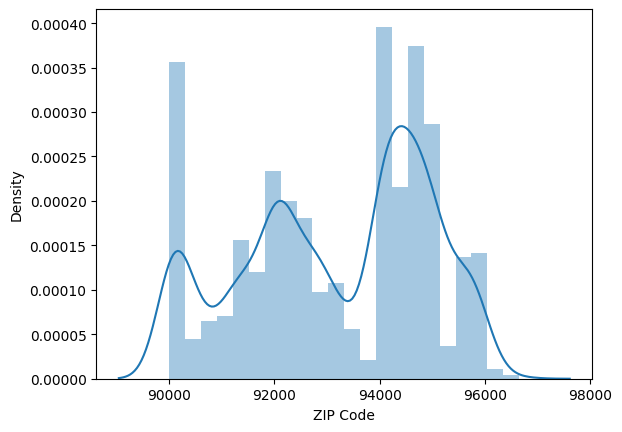

In [27]:
sns.distplot(df['ZIP Code'])

In [28]:
df = df[df['Experience'] >= 0]

### skewness and transformation analysis (identify semi-const value)

In [29]:
from scipy.stats import skew

In [30]:
skewed_features = df[numerical_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness

,Skew
Mortgage,2.103630
CCAvg,1.593900
Income,0.841608
Experience,-0.014698
Age,-0.022185


In [31]:
from scipy.stats import probplot, boxcox
from collections import defaultdict

In [32]:
r2_scores = defaultdict(tuple)

for feature in numerical_features:
    print(feature)
    orig = df[feature] + 1.0

    _, (*_, R_orig) = probplot(orig, rvalue=True)
    _, (*_, R_log) = probplot(np.log(orig), rvalue=True)
    _, (*_, R_sqrt) = probplot(np.sqrt(orig), rvalue=True)
    _, (*_, R_boxcox) = probplot(boxcox(orig)[0], rvalue=True)
    r2_scores[feature] = (
        R_orig * R_orig,
        R_log * R_log,
        R_sqrt * R_sqrt,
        R_boxcox * R_boxcox
    )

r2_scores = pd.DataFrame(
    r2_scores, index=("Original", "Log", "Sqrt", "BoxCox")
).T

r2_scores["Winner"] = r2_scores.idxmax(axis=1)
r2_scores

Age
Experience
Income
CCAvg
Mortgage


,Original,Log,Sqrt,BoxCox,Winner
Age,0.961154,0.953039,0.959627,0.961159,BoxCox
Experience,0.963056,0.875473,0.953031,0.963706,BoxCox
Income,0.928239,0.978948,0.980805,0.988596,BoxCox
CCAvg,0.848039,0.977618,0.933213,0.982551,BoxCox
Mortgage,0.628794,0.623406,0.662676,0.591172,Sqrt


Any transformation does not help Mortgage, we probably need binarization on Mortgage feature

### Categorical feature distribution

<ipython-input-33-b2bde2cd9cb6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=ax, palette="Set2")
<ipython-input-33-b2bde2cd9cb6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=ax, palette="Set2")
<ipython-input-33-b2bde2cd9cb6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=ax, palette="Set2")
<ipython-input-33-b2bde2cd9cb6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

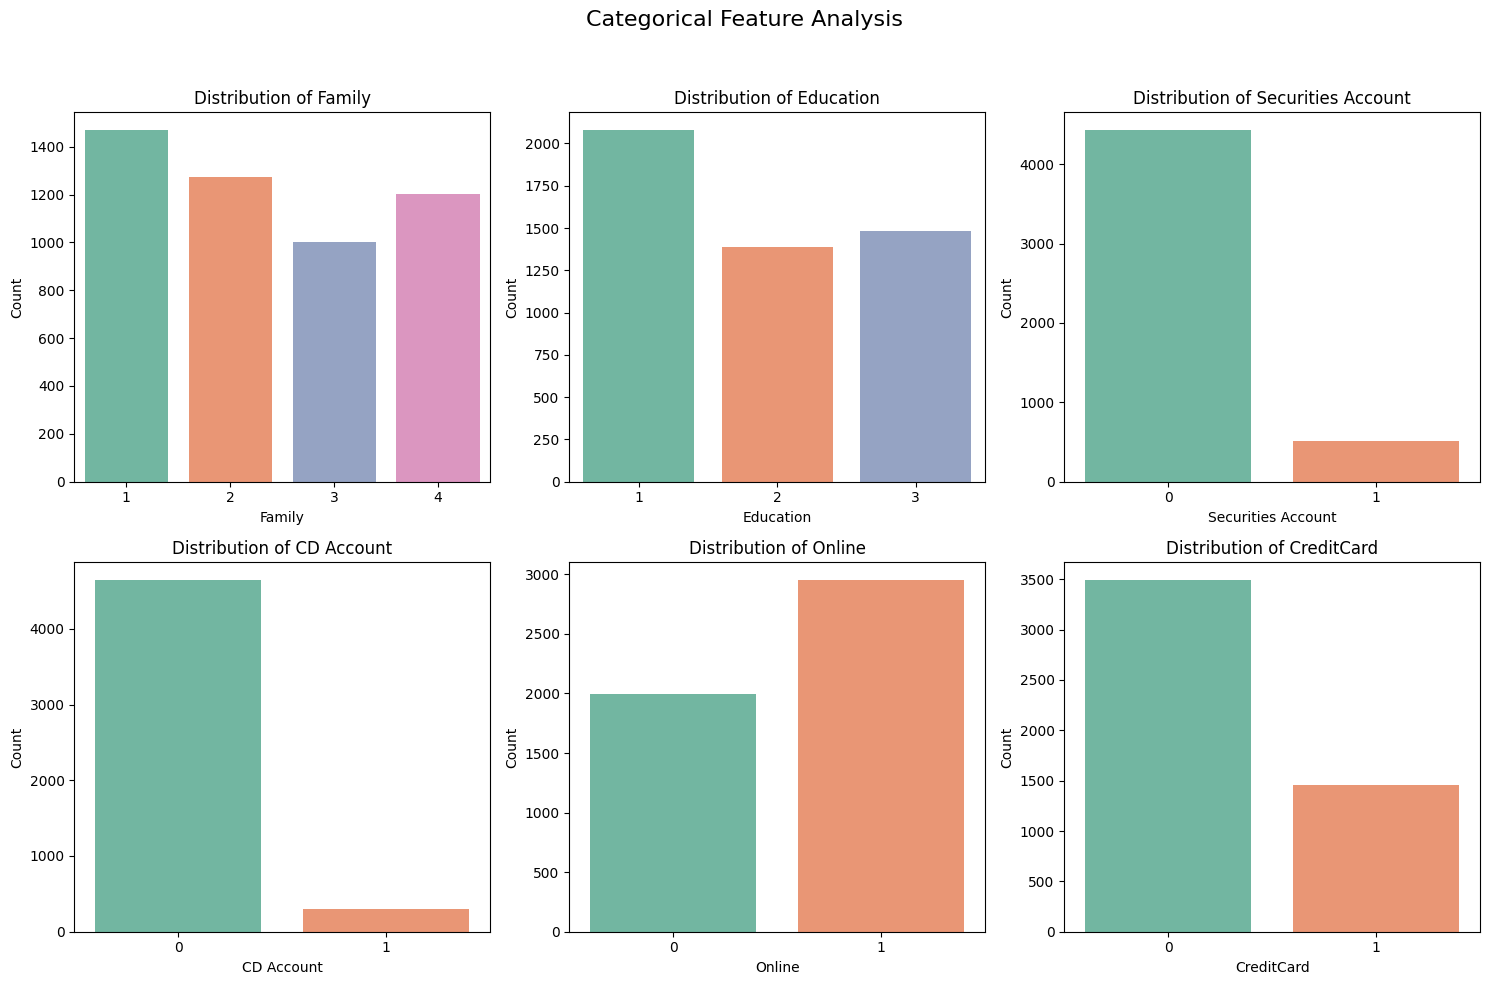

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Categorical Feature Analysis", fontsize=16)

categorical_features = ["Family", "Education", "Securities Account", "CD Account", "Online", "CreditCard"]
for i, feature in enumerate(categorical_features):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    sns.countplot(data=df, x=feature, ax=ax, palette="Set2")
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include the title
plt.show()

key insights: securities accound and CD account are small

Todo list
- binarization
- KNN imputation
- kNN ecoding of zip code

## Correlation Analysis

### This time, deal with categorical data first, let's see how it correlates with target

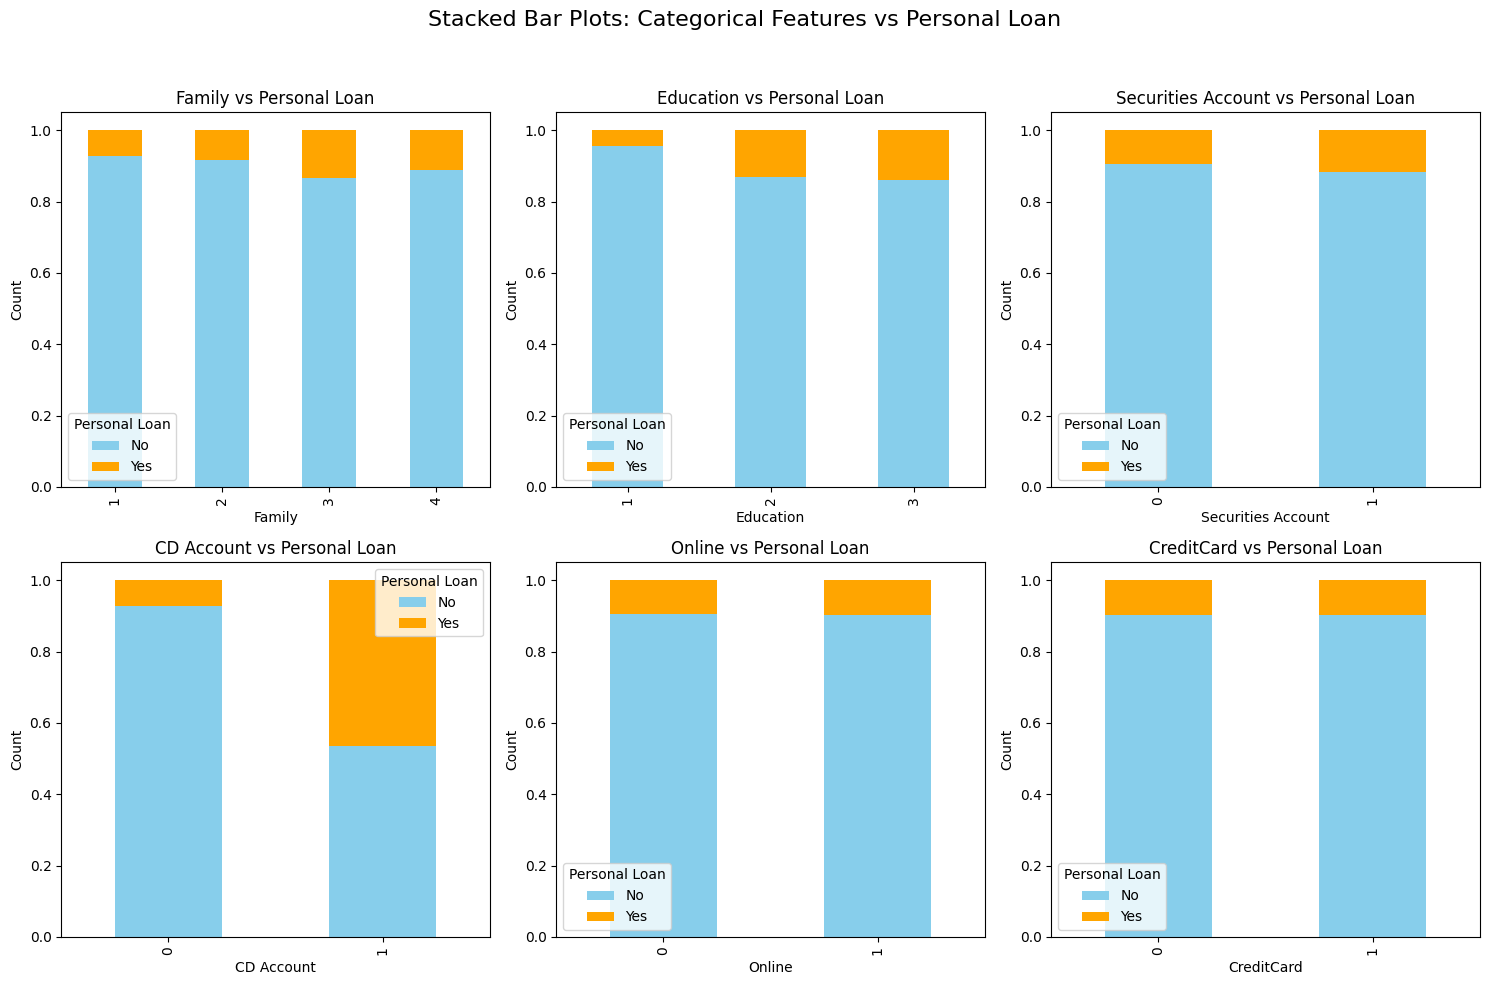

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Stacked Bar Plots: Categorical Features vs Personal Loan", fontsize=16)

for i, feature in enumerate(categorical_features):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    crosstab = pd.crosstab(df[feature], df['Personal Loan'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])
    ax.set_title(f"{feature} vs Personal Loan")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend(title="Personal Loan", labels=["No", "Yes"])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include the title
plt.show()

It can be seen that people with CD account, security account, higher education, and more family member tend to have personal loan. credit card and online does not help.

### Now let's check numerical features

#### correlation heatmap

In [35]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
royalblue = LinearSegmentedColormap.from_list(
    'royalblue',
    [(0, 1, 1), (0.25, 0.41, 0.88)]  # List of RGB tuples for the colors
)
royalblue_r = royalblue.reversed()

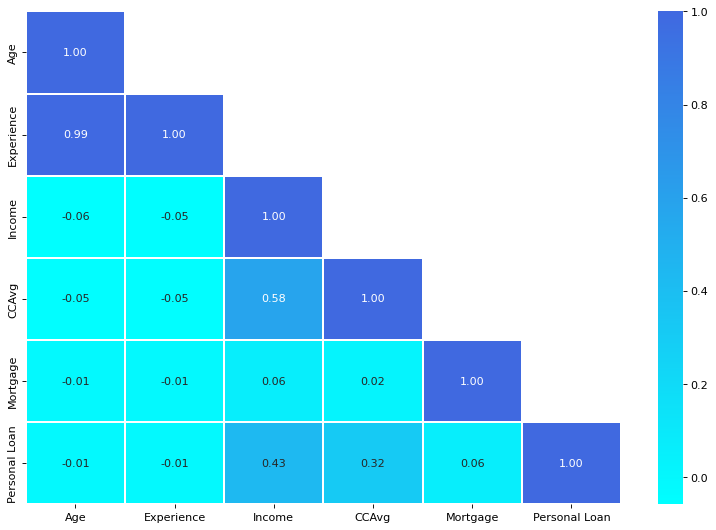

In [40]:
target = 'Personal Loan'
corr = pd.concat([df[numerical_features],df[target]],axis=1).corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

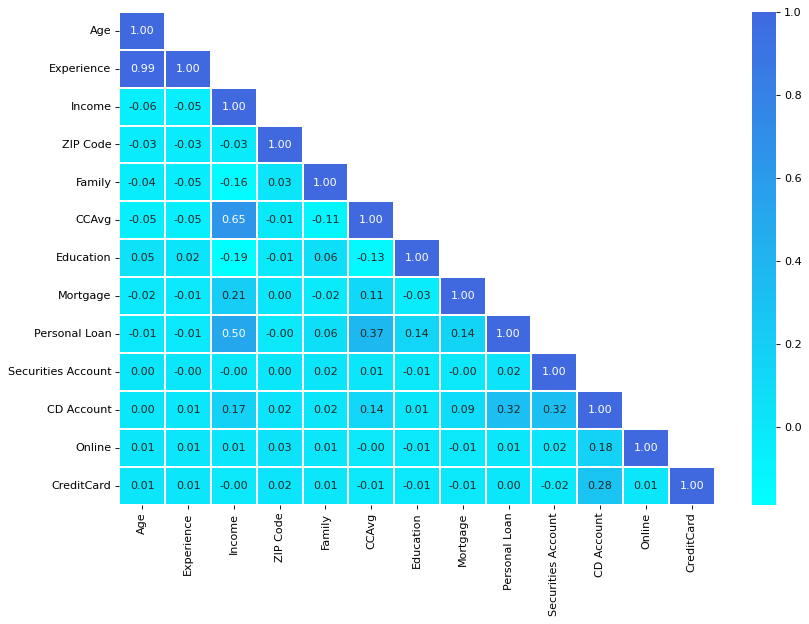

In [39]:
target = 'Personal Loan'
corr = df.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

Key observations:
- Age is strongly correlated with experience, we may drop one of them
- Personal Loan is highly correlated with Income, CD_Account, CCAvg
- CCAvg is highly correlated with Income

#### pairplot within numerical features

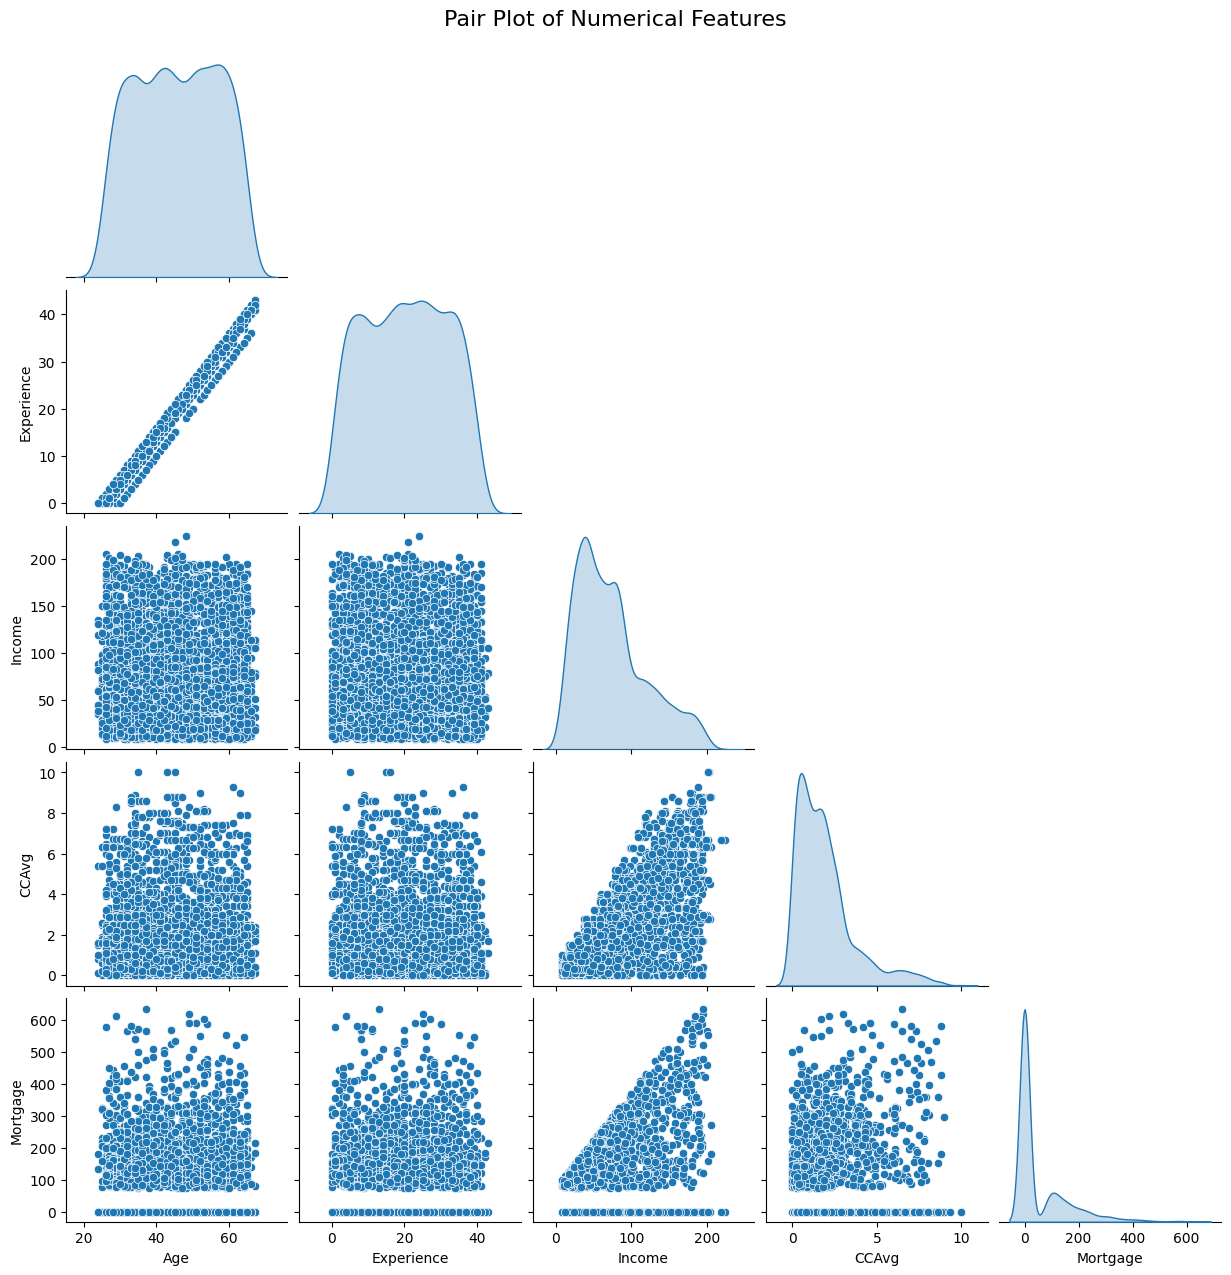

In [41]:
sns.pairplot(df[numerical_features], diag_kind="kde", corner=True, height=2.5)
plt.suptitle("Pair Plot of Numerical Features", y=1.02, fontsize=16)
plt.show()

#### violinplot/kdeplot for numerical features vs target

In [42]:
numerical_features = ["Age", "Experience", "Income", "CCAvg", "Mortgage","ZIP Code"]

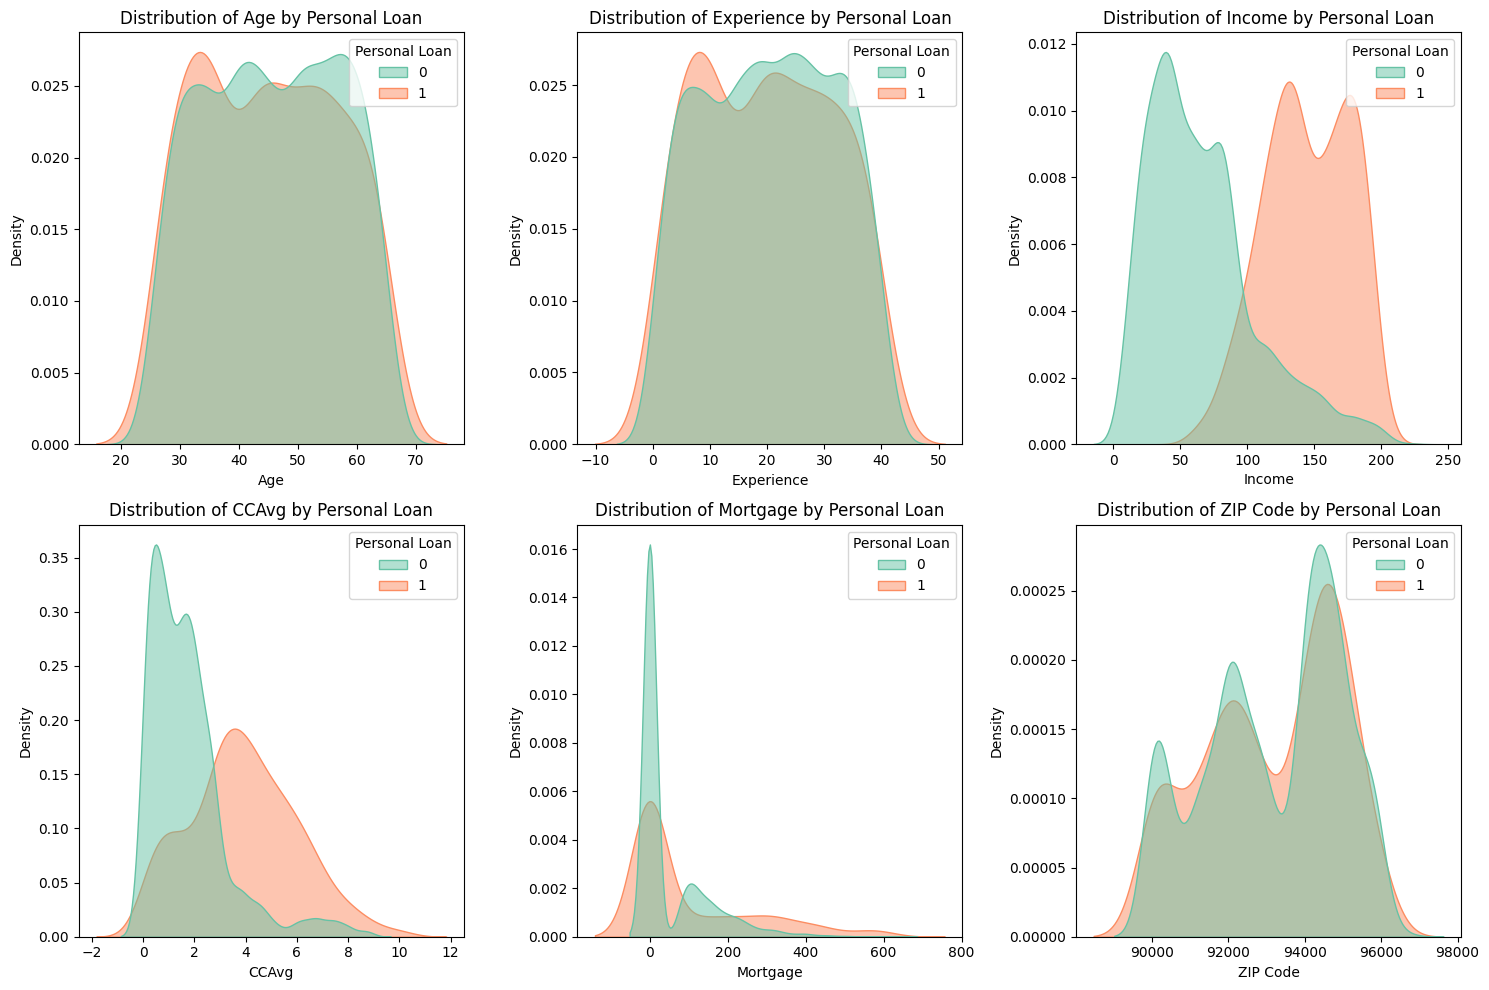

In [43]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(
        data=df,
        x=feature,
        hue="Personal Loan",
        fill=True,
        common_norm=False,
        alpha=0.5,
        palette="Set2"
    )
    plt.title(f"Distribution of {feature} by Personal Loan")
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

<ipython-input-44-190a9b345010>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-44-190a9b345010>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-44-190a9b345010>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-44-190a9b345010>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-44-190a9b345010>:4: FutureWarning: 

Pass

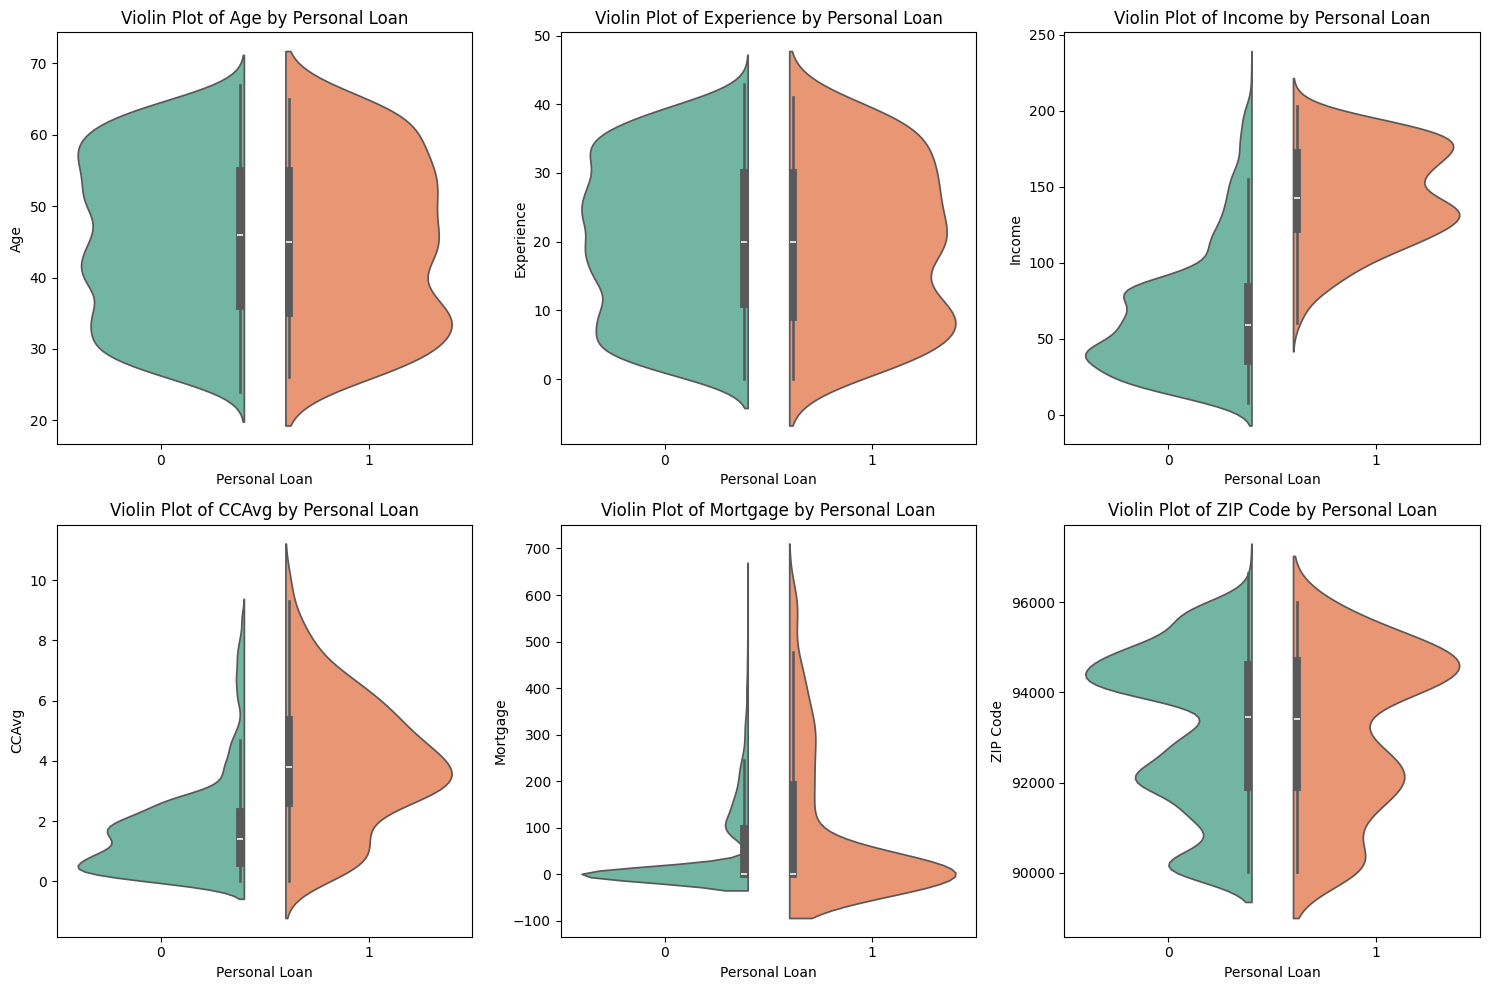

In [44]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(
        data=df,
        x="Personal Loan",
        y=feature,
        palette="Set2",
        split=True
    )
    plt.title(f"Violin Plot of {feature} by Personal Loan")
    plt.xlabel("Personal Loan")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Conclusion:
- CC avg
- income
- high mortgage

# Preprocess

## Outlier Treatment

<ipython-input-45-c35362414600>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-45-c35362414600>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-45-c35362414600>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-45-c35362414600>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-45-c35362414600>:4: FutureWarning: 

Passing `palette

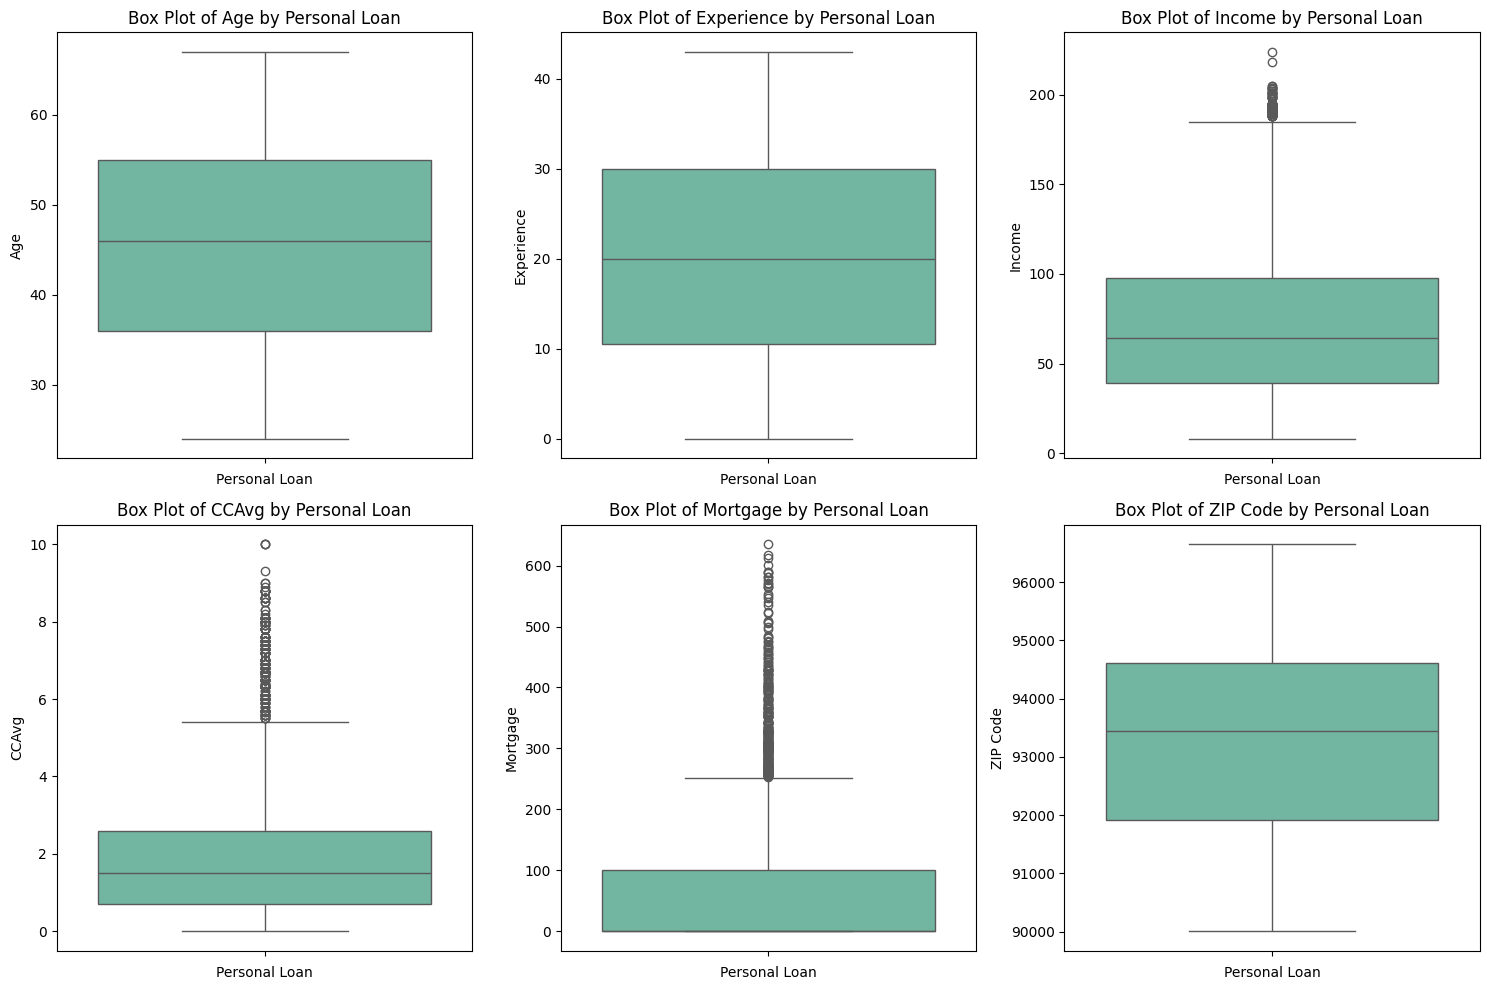

In [45]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        data=df,
        #x="Personal Loan",
        y=feature,
        palette="Set2"
    )
    plt.title(f"Box Plot of {feature} by Personal Loan")
    plt.xlabel("Personal Loan")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

- There is a lot of "outliers" for mortgage, income, and CCAvg. However, these outliers may contain important information. So maybe we shouldn't remove them

In [46]:
def drop_outlier(df, feature):
  IQR = 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25))
  LowerBound = df[feature].quantile(0.75) - IQR
  UpperBound = df[feature].quantile(0.75) + IQR

  outlier_indices = df[(df[feature] < LowerBound) | (df[feature] > UpperBound)].index
  df_new = df.drop(outlier_indices,inplace=False)
  return df_new

## Interpretation of dataset

### Multiply CCavg by 12 to make it annual

In [47]:
df['CCAvg'] = df['CCAvg']*12

### Drop experience

In [48]:
df.drop('Experience',inplace=True,axis=1)

## Transformation

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, StandardScaler, Binarizer
from sklearn.pipeline import Pipeline

KeyboardInterrupt: 

In [ ]:
df["CCAvg"] = df["CCAvg"] + 1.0

In [ ]:
boxcox_columns = ["Age", "Income", "CCAvg"]
sqrt_columns = ["Mortgage"]

boxcox_transformer = PowerTransformer(method="box-cox", standardize=True)  # Box-Cox
sqrt_transformer = Pipeline([
    ("sqrt", FunctionTransformer(np.sqrt, feature_names_out="one-to-one")),  # Sqrt transformation
    ("scaler", StandardScaler())  # Standardize after sqrt transformation
])


# Define the column transformer
preprocess_pipeline_1 = ColumnTransformer(
    transformers=[
        ("boxcox", boxcox_transformer, boxcox_columns),
        ("sqrt", sqrt_transformer, sqrt_columns),

        #("binarize_mortgage", Binarizer(threshold=0), ["Mortgage"]),
        #("drop_id", "drop", ["ID"]),
    ],
    remainder="passthrough"  # Keep other columns as they are
)

transformed_data = preprocess_pipeline_1.fit_transform(df)

# Convert back to a DataFrame with appropriate column names
transformed_df = pd.DataFrame(
    transformed_data,
    columns=boxcox_columns + sqrt_columns + [col for col in df.columns if col not in boxcox_columns + sqrt_columns]
)

In [ ]:
transformed_df

In [ ]:
boxcox_columns = ["Age", "Income", "CCAvg"]
sqrt_columns = ["Mortgage"]

boxcox_transformer = PowerTransformer(method="box-cox", standardize=True)  # Box-Cox
sqrt_transformer = Pipeline([
    ("sqrt", FunctionTransformer(np.sqrt, feature_names_out="one-to-one")),  # Sqrt transformation
    ("scaler", StandardScaler())  # Standardize after sqrt transformation
])


# Define the column transformer
preprocess_pipeline_1 = ColumnTransformer(
    transformers=[
        ("boxcox", boxcox_transformer, boxcox_columns),
        ("sqrt", sqrt_transformer, sqrt_columns),
        ("binarize_mortgage", Binarizer(threshold=200), ["Mortgage"]),
        #("drop_id", "drop", ["ID"]),
    ],
    remainder="passthrough"  # Keep other columns as they are
)

transformed_data = preprocess_pipeline_1.fit_transform(df)

# Convert back to a DataFrame with appropriate column names
transformed_df_binaryM = pd.DataFrame(
    transformed_data,
    columns=boxcox_columns + sqrt_columns + ["Mortgage_Category"] + [col for col in df.columns if col not in boxcox_columns + sqrt_columns and col !="Mortgage"]
)

In [ ]:
transformed_df_binaryM["Mortgage_Category"].value_counts()

In [ ]:
def categorize_mortgage(X):
    #median = np.median(X)
    median = np.percentile(X, 75)
    q3 = np.percentile(X, 90)
    return np.digitize(X, bins=[median, q3])

categorize_transformer = Pipeline([
    ("categorize", FunctionTransformer(categorize_mortgage, validate=False)),
])

preprocess_pipeline_2 = ColumnTransformer(
    transformers=[
        ("boxcox", boxcox_transformer, boxcox_columns),
        ("sqrt", sqrt_transformer, sqrt_columns),
        ("categorize_mortgage", categorize_transformer, ["Mortgage"]),
    ],
    remainder="passthrough"  # Keep other columns unchanged
)

transformed_data = preprocess_pipeline_2.fit_transform(df)

# Convert back to a DataFrame with appropriate column names
transformed_df_tripleM = pd.DataFrame(
    transformed_data,
    columns=boxcox_columns + sqrt_columns + ["Mortgage_Category"] + [col for col in df.columns if col not in boxcox_columns + sqrt_columns and col !="Mortgage"]
)

In [ ]:
transformed_df_tripleM["Mortgage_Category"].value_counts()

# Learning with balanced model

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

In [77]:
df = transformed_df_tripleM

In [78]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

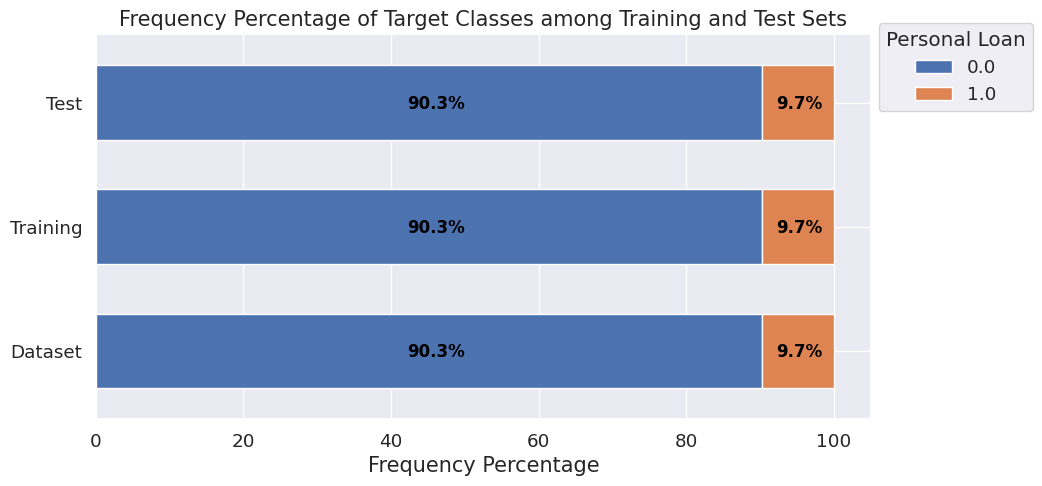

In [79]:
df_perc = pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                     y_train.value_counts(normalize=True).mul(100).round(1),
                     y_test.value_counts(normalize=True).mul(100).round(1)], axis=1)
df_perc.columns=['Dataset','Training','Test']
df_perc = df_perc.T

# Plot frequency percentages barplot
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6)

# Add the percentages to our plot
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(title='Personal Loan', loc=(1.01,0.8))
plt.xlabel('Frequency Percentage', fontsize=15)
plt.title('Frequency Percentage of Target Classes among Training and Test Sets', fontsize=15)
plt.show()

## Metrics

In [66]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [67]:
def f1_metric(model, X_train, y_train):
    return f1_score(y_train, model.predict(X_train), average='binary')

In [68]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [69]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot ROC curve for test data and display AUC score
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()

In [76]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=-1)

    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [82]:
# balanced learning with class weights
#class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]
class_weights = [{0: 0.4474736842105263, 1: 0.5525263157894738}]

# Define hyperparameters grid
param_grid = [
              {'solver':['lbfgs', 'newton-cg', 'sag'],
               'penalty':['l2'],
               'C': np.logspace(-5, 5, 10),
               'class_weight':class_weights},
              {'solver':['saga'],
               'penalty':['elasticnet'],
               'C': np.logspace(-5, 5, 10),
               'l1_ratio': [0.2],
               'class_weight':class_weights}]

# param_grid = [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'],
#                'penalty':['none'],
#                'class_weight':class_weights},

#               {'solver':['lbfgs', 'newton-cg', 'sag'],
#                'penalty':['l2'],
#                'C': np.logspace(-5, 5, 10),
#                'class_weight':class_weights},

#               {'solver':['liblinear', 'saga'],
#                'penalty': ['l1', 'l2'],
#                'C': np.logspace(-5, 5, 10),
#                'class_weight':class_weights},

#               {'solver':['saga'],
#                'penalty':['elasticnet'],
#                'C': np.logspace(-5, 5, 10),
#                'l1_ratio': np.arange(0,1.1,0.1),
#                'class_weight':class_weights}]

In [83]:
# Define the base model
logreg = LogisticRegression()

# Call tune_clf_hyperparameters function to find the optimal combination of hyperparameters
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 46.41588833612782, 'class_weight': {0: 0.4474736842105263, 1: 0.5525263157894738}, 'penalty': 'l2', 'solver': 'newton-cg'}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      3573
         1.0       0.81      0.69      0.74       384

    accuracy                           0.95      3957
   macro avg       0.89      0.84      0.86      3957
weighted avg       0.95      0.95      0.95      3957


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       894
         1.0       0.84      0.73      0.78        96

    accuracy                           0.96       990
   macro avg       0.91      0.86      0.88       990
weighted avg       0.96      0.96      0.96       990



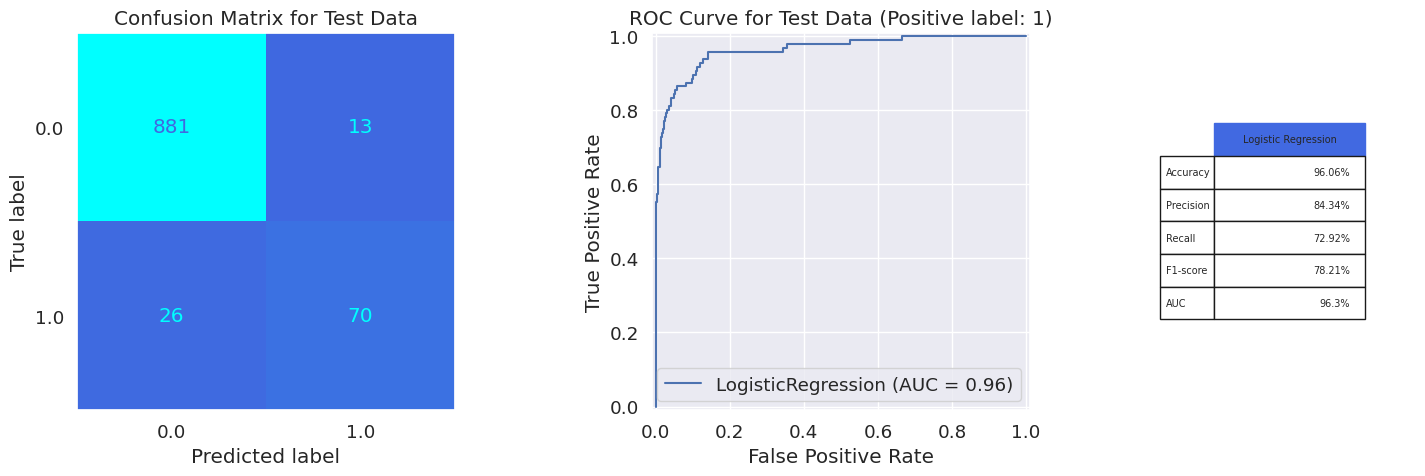

In [84]:
model_evaluation(logreg_opt, X_train, X_test, y_train, y_test, 'Logistic Regression')

## Random Forest

The hyperparameters of a Random Forest classifier are:
- n_estimators: The number of trees in the forest.

- criterion: The function to measure the quality of a split. Common criteria include Gini impurity and information gain.

- max_depth: The maximum depth of a tree. This can be used to control the complexity of the model and prevent overfitting.

- min_samples_split: The minimum number of samples required to split an internal node.

- min_samples_leaf: The minimum number of samples required to be at a leaf node.

- bootstrap: Whether or not to sample with replacement when building the trees in the forest.

- oob_score: Whether or not to use out-of-bag samples to estimate the generalization accuracy.

- class_weight: Weights associated with classes.

- max_features: The maximum number of features to consider when splitting a node. This can be set as a number or a float (percentage) or 'sqrt' or 'log2'.

- n_estimators - Increasing the number of trees in the forest will increase the variance, as more trees in the forest can capture more diverse patterns in the data.

- max_depth - Increasing the maximum depth of a tree allows the tree to capture more complex patterns in the data, increasing its variance.

- min_samples_split - Decreasing the minimum number of samples required to split an internal node will increase the variance as it allows for more splits to occur.

- min_samples_leaf - Decreasing the minimum number of samples required to be at a leaf node will increase the variance as it allows for smaller leaves to form.

- max_features - Increasing the maximum number of features to consider when splitting a node will increase the variance as it allows for more diverse sets of features to be considered when splitting.

- bootstrap - Sampling with replacement when building the trees in the forest will increase the variance as it allows for more diverse sets of samples to be used for each tree

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
#class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1.0,10)]
class_weights = [{0: 0.5793684210526315, 1: 0.42063157894736847}]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': np.arange(8, 11),
    'min_samples_split': [1, 2],
    'min_samples_leaf': [1, 2],
    'class_weight': class_weights
}

In [92]:
# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
rf_opt = tune_clf_hyperparameters(rf, param_grid, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best hyperparameters:
 {'class_weight': {0: 0.5793684210526315, 1: 0.42063157894736847}, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3573
         1.0       1.00      1.00      1.00       384

    accuracy                           1.00      3957
   macro avg       1.00      1.00      1.00      3957
weighted avg       1.00      1.00      1.00      3957


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       894
         1.0       0.97      0.89      0.92        96

    accuracy                           0.99       990
   macro avg       0.98      0.94      0.96       990
weighted avg       0.99      0.99      0.99       990



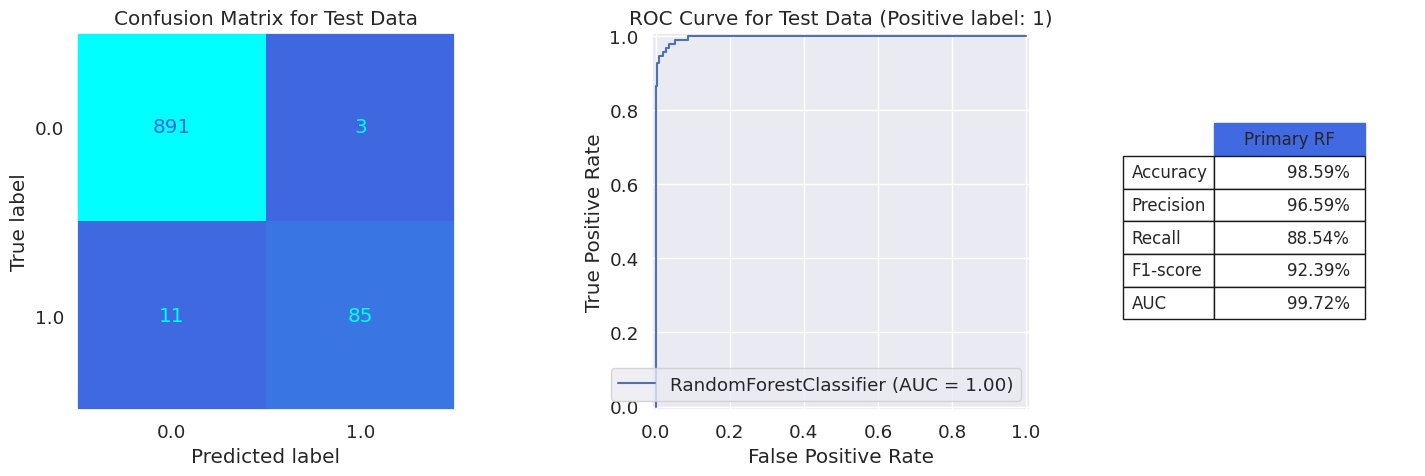

In [93]:
model_evaluation(rf_opt, X_train, X_test, y_train, y_test, 'Primary RF')

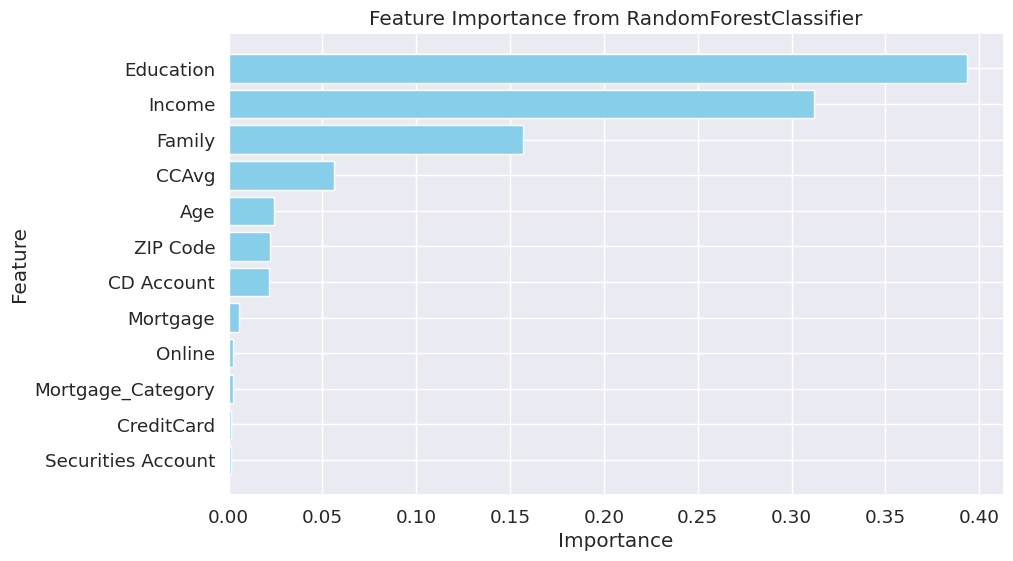

In [94]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_test.columns ,
    'Importance': rf_opt.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForestClassifier')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

## XGBoost

XGBoost Advantages:
- Regularization: Unlike the standard GBM implementation, XGBoost has regularization which helps to reduce overfitting.

- Fast Parallel Processing: XGBoost implements parallel processing, making it much faster than GBM. It also supports Hadoop implementation.

- High Flexibility: XGBoost allows users to define custom optimization objectives and evaluation criteria, providing a new level of customization.

- Handling Missing Values: XGBoost has an in-built routine for handling missing values and can learn how to handle them in future predictions.

- Effective Tree Pruning: XGBoost makes splits up to the specified maximum depth and then prunes the tree, whereas GBM stops splitting when it encounters a negative loss.

- Built-in Cross-Validation and Continued Training: XGBoost allows for cross-validation during each boosting iteration, making it easier to determine the optimum number of iterations. Additionally, it can start training from its last iteration of a previous run.

How to reduce our XGBoost classifier variance?
- min_child_weight: We can increase the value of min_child_weight to control the complexity of the tree model and prevent overfitting.

- max_depth: We can decrease the max_depth to prevent the model from learning too much from the training data and reduce model variance.

- gamma: We can increase the value of gamma to control the minimum loss reduction required to make a split in order to reduce model variance.

- lambda: We can increase the value of lambda to add regularization and control overfitting.

- subsample: We can decrease the value of subsample to reduce the number of samples used to fit each tree and reduce model variance.

- colsample_bytree: We can decrease the value of colsample_bytree to reduce the number of features used in each tree and avoid overfitting.

- n_estimators: we can increase the number of trees to reduce the variance of the model.

In [96]:
from xgboost import XGBClassifier

In [95]:
# Define imbalance ratio
ratio = sum(y_train==0)/sum(y_train==1)

# Define the hyperparameter grid to search
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [ratio, ratio*1.3, ratio*1.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'max_delta_step': [0, 1, 2],
    'gamma': [0, 0.1, 1],
    'max_leaf_nodes': [2, 4, 6]
}

In [97]:
xgb_opt = XGBClassifier(max_depth=5,
                        learning_rate=0.3,
                        n_estimators=200,
                        min_child_weight=1,
                        scale_pos_weight=1.5,
                        colsample_bytree=0.8,
                        gamma=0.1,
                        booster='gbtree',
                        objective='binary:logistic',
                        eval_metric='error',
                        random_state=0)

# Train the XGBoost Classifier
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3573
         1.0       1.00      1.00      1.00       384

    accuracy                           1.00      3957
   macro avg       1.00      1.00      1.00      3957
weighted avg       1.00      1.00      1.00      3957


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       894
         1.0       0.94      0.92      0.93        96

    accuracy                           0.99       990
   macro avg       0.96      0.95      0.96       990
weighted avg       0.99      0.99      0.99       990



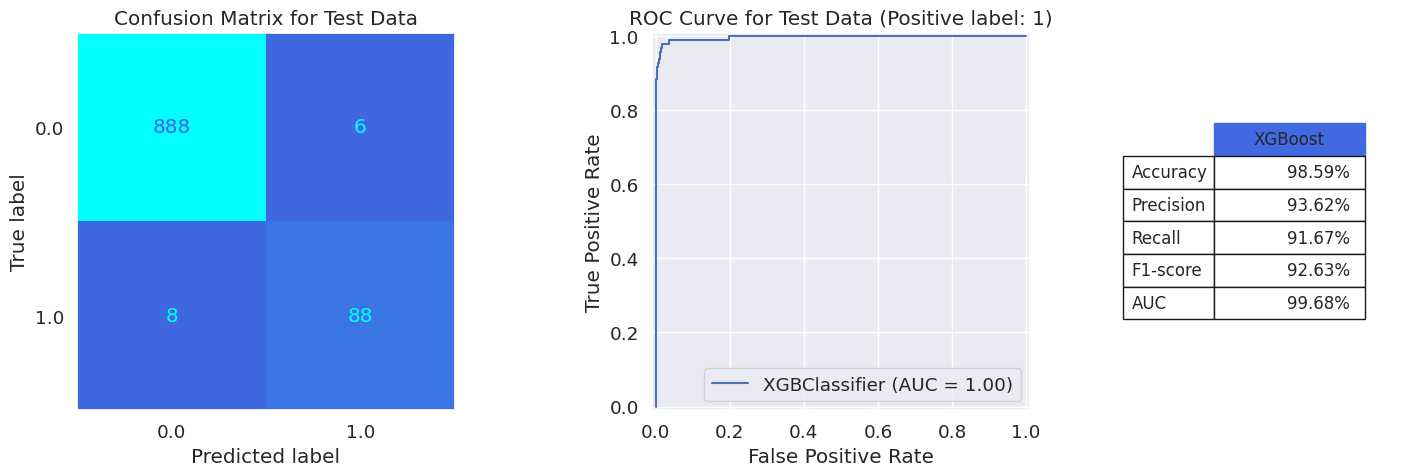

In [99]:
model_evaluation(xgb_opt, X_train, X_test, y_train, y_test, 'XGBoost')

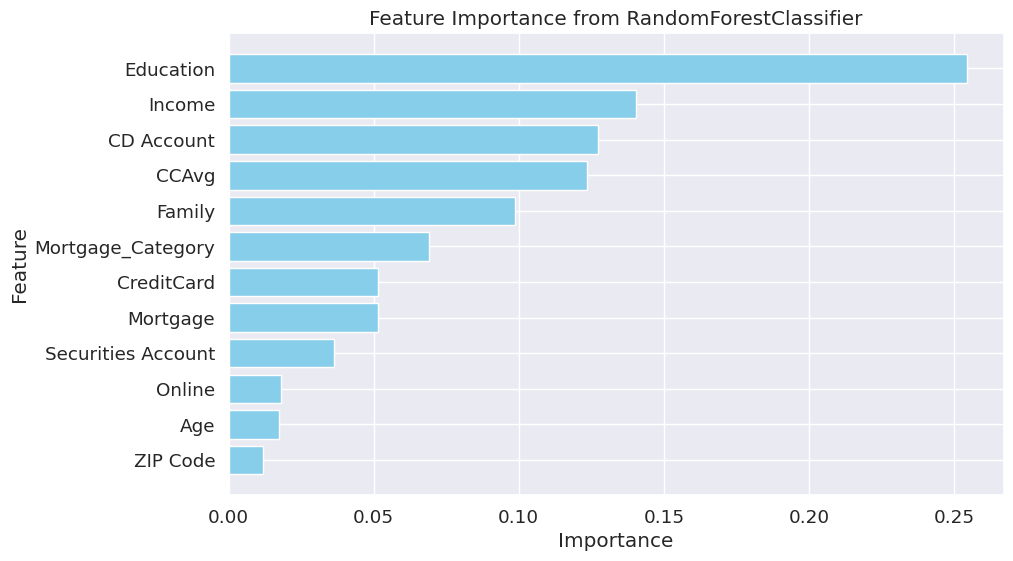

In [100]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_test.columns ,
    'Importance': xgb_opt.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForestClassifier')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Learning with undersampling

In [101]:
def get_undersampling_fraction(y_true):
    N0, N1 = np.bincount(y_true)
    return 1 - N1 / N0

In [117]:
undersampling_frac = get_undersampling_fraction(y_train)

train_ids = y_train.index.to_numpy()

undersampling_frac = get_undersampling_fraction(y_train)

# Get indices for the majority and minority classes
majority_ids = y_train[y_train == 0].index
minority_ids = y_train[y_train == 1].index

# Perform undersampling on the majority class
undersampled_majority_ids = majority_ids.to_series().sample(
    frac=(1-undersampling_frac), random_state=42
).index

# Combine undersampled majority class with all minority class indices
balanced_ids = np.concatenate([undersampled_majority_ids, minority_ids])

# Subset X_train and y_train with the balanced indices
X_train_balanced = X_train.loc[balanced_ids]
y_train_balanced = y_train.loc[balanced_ids]

In [118]:
X_train.shape, X_train_balanced.shape

((3957, 12), (768, 12))

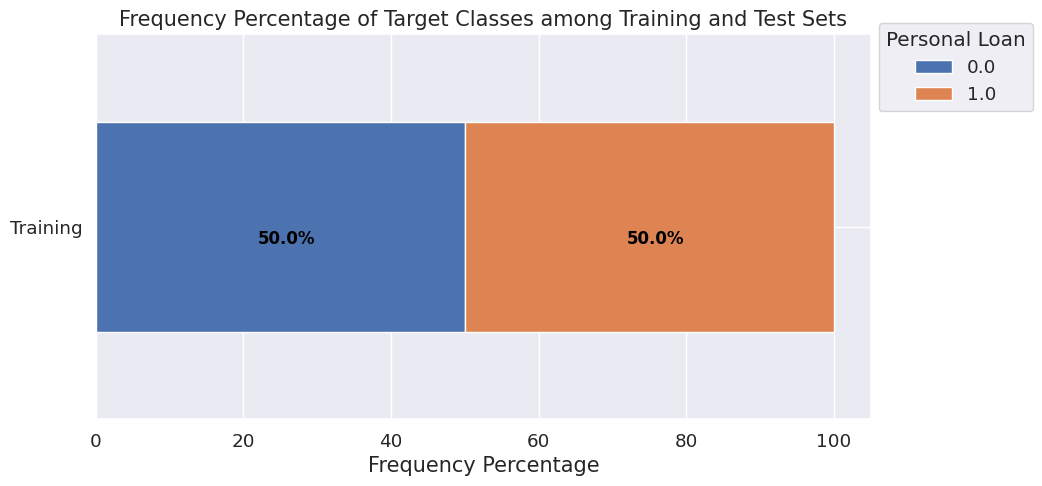

In [119]:
df_perc = pd.concat([
                     y_train_balanced.value_counts(normalize=True).mul(100).round(1),
                     ], axis=1)
df_perc.columns=['Training']
df_perc = df_perc.T

# Plot frequency percentages barplot
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6)

# Add the percentages to our plot
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(title='Personal Loan', loc=(1.01,0.8))
plt.xlabel('Frequency Percentage', fontsize=15)
plt.title('Frequency Percentage of Target Classes among Training and Test Sets', fontsize=15)
plt.show()

In [120]:
xgb_opt = XGBClassifier(max_depth=5,
                        learning_rate=0.3,
                        n_estimators=200,
                        min_child_weight=1,
                        colsample_bytree=0.8,
                        gamma=0.1,
                        booster='gbtree',
                        objective='binary:logistic',
                        eval_metric='error',
                        random_state=0)

# Train the XGBoost Classifier
xgb_opt.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       384
         1.0       1.00      1.00      1.00       384

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       894
         1.0       0.76      0.96      0.85        96

    accuracy                           0.97       990
   macro avg       0.88      0.96      0.91       990
weighted avg       0.97      0.97      0.97       990



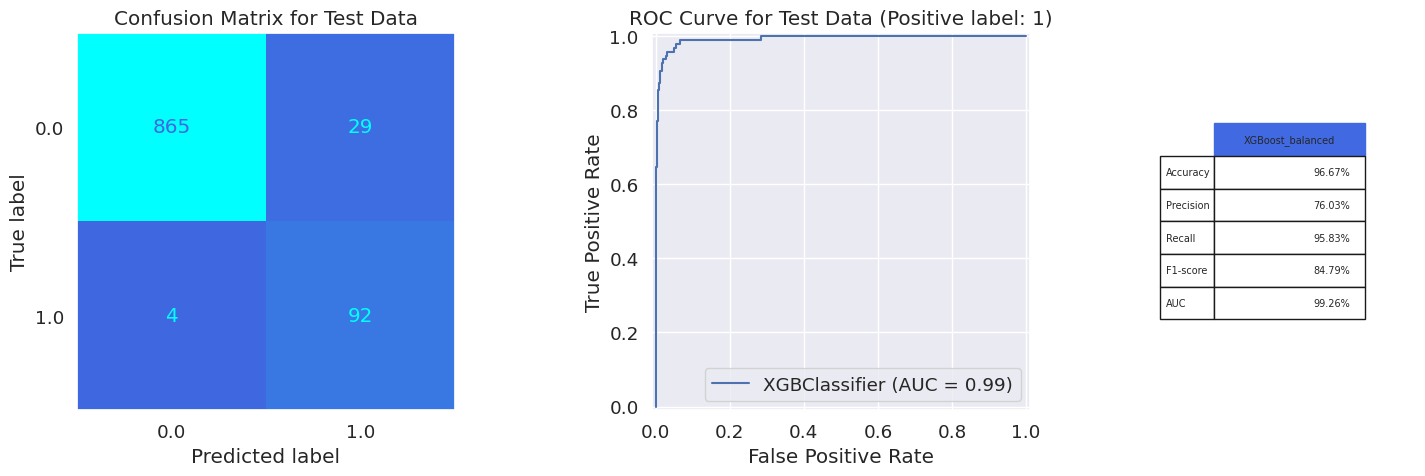

In [121]:
model_evaluation(xgb_opt, X_train_balanced, X_test, y_train_balanced, y_test, 'XGBoost_balanced')